In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymcdm
import pysensmcda

In [2]:
data = pd.read_csv('uaScoresDataFrame.csv')
data

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,Canada,North America,7.5525,5.882,3.7965,0.000,1.4755,5.10450,...,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,6.6590,4.2430
262,262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,...,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
263,263,Yerevan,Armenia,Asia,9.6945,9.431,3.9265,0.000,1.7870,5.64925,...,8.8730,5.102000,0.0000,4.43950,3.4580,8.0550,3.9000,4.7370,7.3465,7.7765
264,264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,...,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


In [3]:
data[data['UA_Continent'] == 'Europe']

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
6,6,Andorra,Andorra,Europe,3.9690,0.000,1.0000,0.000,0.5000,0.00000,...,9.5535,0.000000,0.0000,7.25600,0.0000,4.4750,7.1860,2.1320,8.7035,3.5885
10,10,Athens,Greece,Europe,9.0525,6.500,4.4040,2.325,3.7070,5.21975,...,6.7585,7.153000,3.1625,3.80225,3.3200,4.1665,2.2280,7.8760,6.2680,6.4830
18,18,Barcelona,Spain,Europe,6.3230,6.074,7.7585,5.655,5.8060,5.69925,...,7.4075,8.403333,5.0290,3.66550,4.2960,3.8940,6.4680,8.5915,7.4715,5.8280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,257,Vilnius,Lithuania,Europe,8.6210,7.576,4.2230,2.828,2.1050,5.92775,...,8.8570,6.330667,3.7000,8.71775,4.6910,6.5925,7.9265,5.1985,7.3930,4.1060
258,258,Warsaw,Poland,Europe,7.8695,8.192,6.1215,1.853,3.8640,5.20300,...,8.6995,6.881667,4.6685,6.38900,4.7615,5.0970,6.0000,7.3355,4.6360,4.9610
262,262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,...,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
264,264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,...,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


In [4]:
data.columns

Index(['Unnamed: 0', 'UA_Name', 'UA_Country', 'UA_Continent', 'Housing',
       'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity',
       'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education',
       'Environmental Quality', 'Economy', 'Taxation', 'Internet Access',
       'Leisure & Culture', 'Tolerance', 'Outdoors'],
      dtype='object')

In [5]:
temp = data[(data['UA_Continent'] == 'Europe') & (data['Environmental Quality'] > 9)]
temp

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
27,27,Bern,Switzerland,Europe,4.9225,1.000,2.6875,0.000,5.2635,5.19775,...,9.2660,7.520333,5.3455,9.24450,6.5520,6.4285,6.1145,4.2450,8.5890,2.1225
103,103,Hannover,Germany,Europe,7.7540,6.000,1.0000,0.000,5.6460,6.54975,...,7.3525,8.133667,4.8340,9.13125,5.3735,3.9035,5.6660,3.5255,7.2660,4.2665
105,105,Helsinki,Finland,Europe,5.3960,4.121,5.6830,5.507,4.7505,5.77925,...,8.6740,7.953667,5.4545,9.30100,3.9210,4.8785,5.1035,7.0545,7.5015,4.7980
132,132,Leipzig,Germany,Europe,8.1770,5.911,2.7065,0.000,4.3370,6.01375,...,7.2770,7.300333,4.3065,9.03275,5.3735,3.9035,5.6465,4.5265,7.1935,4.7470
147,147,Malmo,Sweden,Europe,7.2630,5.570,3.6450,2.683,4.7675,5.64675,...,6.5980,8.215000,3.8930,9.20550,5.6945,2.7495,8.2200,2.3445,5.3040,4.5240
165,165,Munich,Germany,Europe,4.2300,4.648,6.9150,6.509,8.0565,6.01400,...,9.0490,8.371000,7.5545,9.01825,5.3735,3.9035,5.1550,7.3360,8.4745,7.3310
237,237,Tartu,Estonia,Europe,8.9610,7.470,2.7780,0.000,1.4140,6.44100,...,9.3765,8.395000,5.4035,9.41600,4.1850,5.3410,4.3005,4.0810,7.4830,3.4990
249,249,Turku,Finland,Europe,7.5340,5.070,1.8795,1.773,3.2240,6.72850,...,9.1755,8.712667,5.3475,9.10475,3.9210,4.8785,6.6825,5.0975,7.7515,4.5375
256,256,Vienna,Austria,Europe,6.3140,5.111,5.7980,3.635,8.0315,6.21325,...,8.5965,8.198000,4.8545,9.27000,4.6630,2.6660,6.1730,8.5215,8.9640,5.2945


In [6]:
selected_params = ['UA_Name', 'Housing', 'Cost of Living', 'Travel Connectivity', 'Safety', 'Healthcare', 'Education', 'Leisure & Culture', 'Tolerance']

data_df = temp[selected_params]
data_df

,UA_Name,Housing,Cost of Living,Travel Connectivity,Safety,Healthcare,Education,Leisure & Culture,Tolerance
27,Bern,4.9225,1.000,5.2635,9.2660,7.520333,5.3455,4.2450,8.5890
103,Hannover,7.7540,6.000,5.6460,7.3525,8.133667,4.8340,3.5255,7.2660
105,Helsinki,5.3960,4.121,4.7505,8.6740,7.953667,5.4545,7.0545,7.5015
132,Leipzig,8.1770,5.911,4.3370,7.2770,7.300333,4.3065,4.5265,7.1935
147,Malmo,7.2630,5.570,4.7675,6.5980,8.215000,3.8930,2.3445,5.3040
165,Munich,4.2300,4.648,8.0565,9.0490,8.371000,7.5545,7.3360,8.4745
237,Tartu,8.9610,7.470,1.4140,9.3765,8.395000,5.4035,4.0810,7.4830
249,Turku,7.5340,5.070,3.2240,9.1755,8.712667,5.3475,5.0975,7.7515
256,Vienna,6.3140,5.111,8.0315,8.5965,8.198000,4.8545,8.5215,8.9640


In [7]:
data_df.to_latex()

'\\begin{tabular}{llrrrrrrrr}\n\\toprule\n & UA_Name & Housing & Cost of Living & Travel Connectivity & Safety & Healthcare & Education & Leisure & Culture & Tolerance \\\\\n\\midrule\n27 & Bern & 4.922500 & 1.000000 & 5.263500 & 9.266000 & 7.520333 & 5.345500 & 4.245000 & 8.589000 \\\\\n103 & Hannover & 7.754000 & 6.000000 & 5.646000 & 7.352500 & 8.133667 & 4.834000 & 3.525500 & 7.266000 \\\\\n105 & Helsinki & 5.396000 & 4.121000 & 4.750500 & 8.674000 & 7.953667 & 5.454500 & 7.054500 & 7.501500 \\\\\n132 & Leipzig & 8.177000 & 5.911000 & 4.337000 & 7.277000 & 7.300333 & 4.306500 & 4.526500 & 7.193500 \\\\\n147 & Malmo & 7.263000 & 5.570000 & 4.767500 & 6.598000 & 8.215000 & 3.893000 & 2.344500 & 5.304000 \\\\\n165 & Munich & 4.230000 & 4.648000 & 8.056500 & 9.049000 & 8.371000 & 7.554500 & 7.336000 & 8.474500 \\\\\n237 & Tartu & 8.961000 & 7.470000 & 1.414000 & 9.376500 & 8.395000 & 5.403500 & 4.081000 & 7.483000 \\\\\n249 & Turku & 7.534000 & 5.070000 & 3.224000 & 9.175500 & 8.712667

In [8]:
matrix = data_df.to_numpy()[:, 1:]
matrix

array([[4.922500000000001, 1.0, 5.2635000000000005, 9.266,
        7.520333333333333, 5.3455, 4.245, 8.589],
       [7.754000000000001, 6.000000000000001, 5.646, 7.352500000000002,
        8.133666666666667, 4.834, 3.5255, 7.266],
       [5.396000000000001, 4.121, 4.7505, 8.674000000000001,
        7.953666666666665, 5.4545, 7.054500000000001, 7.501500000000001],
       [8.177, 5.9110000000000005, 4.337, 7.277000000000001,
        7.300333333333332, 4.306500000000001, 4.5265, 7.1935],
       [7.263000000000001, 5.57, 4.7675, 6.598000000000001, 8.215, 3.893,
        2.3445, 5.304],
       [4.23, 4.648, 8.056500000000002, 9.049, 8.370999999999999,
        7.554499999999999, 7.335999999999999, 8.4745],
       [8.961000000000002, 7.47, 1.414, 9.3765, 8.395, 5.4035, 4.081,
        7.483],
       [7.534000000000002, 5.07, 3.224, 9.1755, 8.712666666666667,
        5.347499999999999, 5.0975, 7.751499999999999],
       [6.314000000000001, 5.111, 8.0315, 8.5965, 8.198,
        4.854500000000001,

In [9]:
criteria_types = np.array([1] * matrix.shape[1])

Weights

In [11]:
step = 0.02
N = matrix.shape[1]
weights_scenarios = pysensmcda.criteria.generate_weights_scenarios(N, step, return_array=True, save_zeros=False)
print(weights_scenarios.shape)
weights_scenarios

(85900584, 8)


array([[0.02, 0.84, 0.02, ..., 0.02, 0.02, 0.04],
       [0.04, 0.82, 0.02, ..., 0.02, 0.02, 0.04],
       [0.06, 0.8 , 0.02, ..., 0.02, 0.02, 0.04],
       ...,
       [0.02, 0.02, 0.02, ..., 0.04, 0.02, 0.84],
       [0.02, 0.02, 0.02, ..., 0.02, 0.04, 0.84],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.86]])

In [12]:
weights_scenarios[0:3]

array([[0.02, 0.84, 0.02, 0.02, 0.02, 0.02, 0.02, 0.04],
       [0.04, 0.82, 0.02, 0.02, 0.02, 0.02, 0.02, 0.04],
       [0.06, 0.8 , 0.02, 0.02, 0.02, 0.02, 0.02, 0.04]])

In [13]:
weights_scenarios[-2:]

array([[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.04, 0.84],
       [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.86]])

In [14]:
def get_weights_based_on_ranking(weights_scenarios, criteria_rank):

    if weights_scenarios.shape[1] == criteria_rank.shape[0]:
        criteria_rank_sorted = np.array(sorted(criteria_rank))
        weights = weights_scenarios[np.all(weights_scenarios[:, criteria_rank_sorted[:-1] - 1] > weights_scenarios[:, criteria_rank_sorted[1:] - 1], axis=1)]
        weights = weights[:, criteria_rank-1]
    else:
        satisfies_conditions = np.all(np.diff(weights_scenarios[:, criteria_rank - 1], axis=1) < 0, axis=1)
        weights = weights_scenarios[satisfies_conditions]
    return weights

In [15]:
# 'Housing', 3
# 'Cost of Living', 1
# 'Travel Connectivity', 4
# 'Safety', 2
# 'Healthcare', 6
# 'Education', 5
# 'Leisure & Culture', 8 
# 'Tolerance' 7

complete_ranking = np.array([3, 1, 4, 2, 6, 5, 8, 7])
order_criteria_rank = np.array([2, 4, 1, 3, 6, 5, 8, 7])

In [16]:
weights_scenarios[:, np.array([2, 4]) - 1]

array([[0.84, 0.02],
       [0.82, 0.02],
       [0.8 , 0.02],
       ...,
       [0.02, 0.02],
       [0.02, 0.02],
       [0.02, 0.02]])

In [17]:
np.diff(weights_scenarios[:, np.array([2, 4]) - 1], axis=1)

array([[-0.82],
       [-0.8 ],
       [-0.78],
       ...,
       [ 0.  ],
       [ 0.  ],
       [ 0.  ]])

In [18]:
complete_scenarios = get_weights_based_on_ranking(weights_scenarios, complete_ranking)
complete_scenarios

array([[0.14, 0.24, 0.12, 0.22, 0.08, 0.1 , 0.04, 0.06],
       [0.14, 0.26, 0.12, 0.2 , 0.08, 0.1 , 0.04, 0.06],
       [0.14, 0.28, 0.12, 0.18, 0.08, 0.1 , 0.04, 0.06],
       [0.14, 0.3 , 0.12, 0.16, 0.08, 0.1 , 0.04, 0.06],
       [0.16, 0.24, 0.12, 0.2 , 0.08, 0.1 , 0.04, 0.06],
       [0.16, 0.26, 0.12, 0.18, 0.08, 0.1 , 0.04, 0.06],
       [0.18, 0.22, 0.12, 0.2 , 0.08, 0.1 , 0.04, 0.06],
       [0.16, 0.22, 0.14, 0.2 , 0.08, 0.1 , 0.04, 0.06],
       [0.16, 0.24, 0.14, 0.18, 0.08, 0.1 , 0.04, 0.06],
       [0.16, 0.22, 0.14, 0.18, 0.08, 0.12, 0.04, 0.06],
       [0.16, 0.2 , 0.14, 0.18, 0.1 , 0.12, 0.04, 0.06],
       [0.12, 0.3 , 0.1 , 0.28, 0.06, 0.08, 0.02, 0.04],
       [0.12, 0.32, 0.1 , 0.26, 0.06, 0.08, 0.02, 0.04],
       [0.12, 0.34, 0.1 , 0.24, 0.06, 0.08, 0.02, 0.04],
       [0.12, 0.36, 0.1 , 0.22, 0.06, 0.08, 0.02, 0.04],
       [0.12, 0.38, 0.1 , 0.2 , 0.06, 0.08, 0.02, 0.04],
       [0.12, 0.4 , 0.1 , 0.18, 0.06, 0.08, 0.02, 0.04],
       [0.12, 0.42, 0.1 , 0.16,

In [19]:
complete_scenarios.shape

(116, 8)

In [21]:
bounds = pymcdm.methods.SPOTIS.make_bounds(matrix)
spotis = pymcdm.methods.SPOTIS(bounds)


# For criteria bound visualization

In [24]:
# Initialize an empty list to hold bounds for all criteria
criteria_bounds = []

# Sort ranking
criteria_rank_sorted = np.array(sorted(complete_ranking))
num_criteria = complete_ranking.shape[0]

# Initialize storage for each criterion
for _ in range(num_criteria):
    criteria_bounds.append([])  # One list for each criterion

for i in range(2, num_criteria + 1):
    title = f'Criteria ranking ({i} criteria)'
    current_rank = criteria_rank_sorted[criteria_rank_sorted <= i]
    print(i, current_rank)
    
    # Get the weight scenarios based on the current ranking
    current_scenarios = get_weights_based_on_ranking(weights_scenarios, current_rank)
    print(len(current_scenarios))
    
    # Compute min and max weights
    min_weights = np.min(current_scenarios, axis=0)
    max_weights = np.max(current_scenarios, axis=0)
    
    print(min_weights)
    print(max_weights)

    # Store bounds dynamically for all criteria
    for j in range(num_criteria):
        criteria_bounds[j].append([min_weights[j], max_weights[j]])

    print('')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
num_criteria = len(criteria_bounds)

labels = ['$C_2$', '$C_4$', '$C_1$', '$C_3$', '$C_6$', '$C_5$', '$C_8$', '$C_7$']

# Ensure enough colors are available
if num_criteria > len(colors):
    colors.extend(plt.cm.get_cmap('tab10').colors[:num_criteria - len(colors)])

# Define subplot grid size
rows, cols = 4, 2  # 4x2 layout
fig, axes = plt.subplots(rows, cols, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten for easy iteration

x = np.arange(len(criteria_bounds[0]))  # X positions

for idx, (c_bounds, label, color) in enumerate(zip(criteria_bounds, labels, colors)):
    ax = axes[idx]  # Select the corresponding subplot

    min_vals = np.array(c_bounds)[:, 0]
    max_vals = np.array(c_bounds)[:, 1]

    # Fill between min and max values
    ax.fill_between(x, min_vals, max_vals, color=color, alpha=0.2, label=label)

    # Plot min/max values with markers
    ax.plot(x, min_vals, color=color, linestyle='-', marker='o', markersize=6)
    ax.plot(x, max_vals, color=color, linestyle='-', marker='o', markersize=6)

    # Formatting
    ax.set_xticks(x)
    ax.set_xticklabels(x + 1, fontsize=16)
    ax.set_ylim(0, 1)
    ax.set_yticks(np.linspace(0, 1, 5))
    ax.set_yticklabels(['0.00', '0.25', '0.50', '0.75', '1.00'], fontsize=16)
    ax.set_title(f'{label}', fontsize=20)
    ax.grid(True, linestyle='--', alpha=0.5)

# Remove empty subplots if fewer than 8 criteria
for i in range(num_criteria, rows * cols):
    fig.delaxes(axes[i])

# Add common X and Y labels
fig.text(0.5, 0.02, 'Number of known criteria ranking relationships', ha='center', fontsize=22)
fig.text(0.02, 0.5, 'Weight values spread', va='center', rotation='vertical', fontsize=22)

# Adjust layout to make space for common labels
fig.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.08, hspace=0.2, wspace=0.05)

plt.savefig('spreads_grid.pdf', bbox_inches='tight')
plt.show()


# Function for counting percentages of rankings

In [25]:
def count_positions(rankings):
    ALT = len(rankings[0])
    columns_labels = [f'A{i+1}' for i in range(ALT)]

    pd_rank = pd.DataFrame(rankings, columns=columns_labels)
    rank_prob = np.zeros((ALT, ALT))

    for row, col in enumerate(pd_rank.columns):
        for pos in range(ALT):
            rank_prob[pos, row] = len(pd_rank[pd_rank[col] == pos+1])
    
    rank_prob = np.round(rank_prob / len(pd_rank) * 100, 2)
    return rank_prob.T

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import os

MAX_WORKERS = os.cpu_count() or 8

def compute_rank(weights):
    pref = spotis(matrix, weights, criteria_types)
    return spotis.rank(pref)

num_criteria = complete_ranking.shape[0]

alts_data_rank = [[] for _ in range(matrix.shape[0])]
for i in tqdm(range(num_criteria, 2, -1), desc="Processing Criteria Sets"):
    current_rank = order_criteria_rank[0:i] if i != num_criteria else complete_ranking
    title = f'Criteria ranking ({i} criteria)'
    print(i, current_rank)

    current_scenarios = get_weights_based_on_ranking(weights_scenarios, current_rank)
    print(len(current_scenarios))

    BATCH_SIZE = 100000  # Adjust based on available memory

    ranks = []
    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        for batch_start in range(0, len(current_scenarios), BATCH_SIZE):
            print(batch_start)
            batch = current_scenarios[batch_start:batch_start + BATCH_SIZE]
            batch_ranks = list(executor.map(compute_rank, batch))
            ranks.extend(batch_ranks)  # Append results in batches

    ranks = np.array(ranks)

    alts_positions = count_positions(ranks)
    for idx, ap in enumerate(alts_positions):
        alts_data_rank[idx].append(list(ap))
    np.save(f'alts_data_rank_{i}.npy', np.array(alts_data_rank))


2 [2 4]
39680014
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1

In [33]:
alts_data_rank

[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.21, 63.79],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 39.26, 60.74],
  [0.0, 0.0, 0.0, 0.01, 1.08, 1.77, 2.54, 64.82, 29.79],
  [0.0, 0.0, 0.01, 0.01, 0.94, 1.64, 6.69, 43.46, 47.25],
  [0.0, 0.0, 0.04, 0.03, 1.34, 5.4, 18.53, 41.5, 33.17],
  [0.0, 0.0, 0.75, 0.76, 2.91, 9.02, 28.24, 32.17, 26.15],
  [0.0, 0.0, 0.7, 0.78, 2.5, 5.92, 18.18, 30.1, 41.81]],
 [[0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.04, 0.26, 68.56, 29.21, 1.93, 0.0, 0.0],
  [0.0, 0.03, 0.13, 0.66, 56.33, 30.83, 11.55, 0.46, 0.0],
  [0.0, 0.04, 0.12, 1.24, 56.69, 34.14, 7.33, 0.44, 0.0],
  [0.0, 0.04, 0.1, 0.53, 37.56, 50.78, 10.15, 0.84, 0.0],
  [0.0, 0.03, 3.8, 4.74, 32.51, 47.24, 10.89, 0.8, 0.0],
  [0.0, 0.8, 9.42, 11.66, 39.85, 29.76, 7.93, 0.58, 0.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 71.55, 28.45, 0.0, 0.0],
  [0.0, 0.0, 0.35, 0.4, 30.39, 43.3, 25.34, 0.22, 0.0],
  [0.0, 0.0, 0.96, 1.11, 39.64, 26.85, 31.21, 0.23, 0.0],
  [0.0, 0.0, 1.1, 0.82, 38.91, 41.77, 16.

# Heatmaps visualization

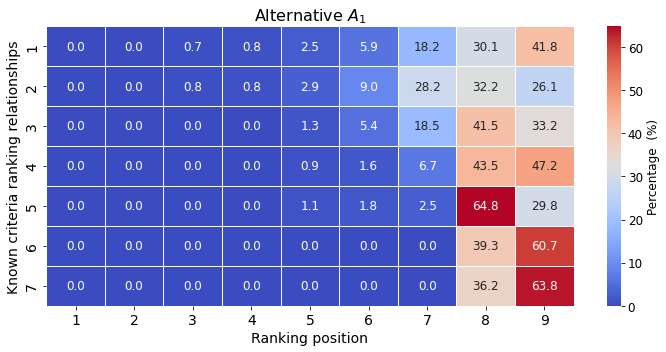

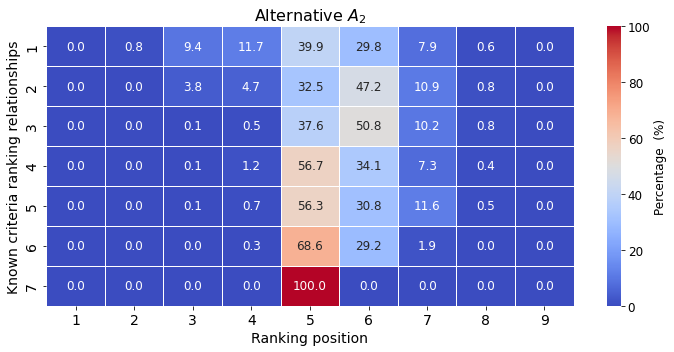

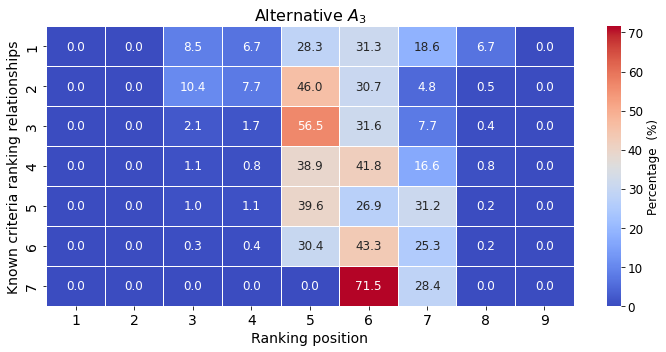

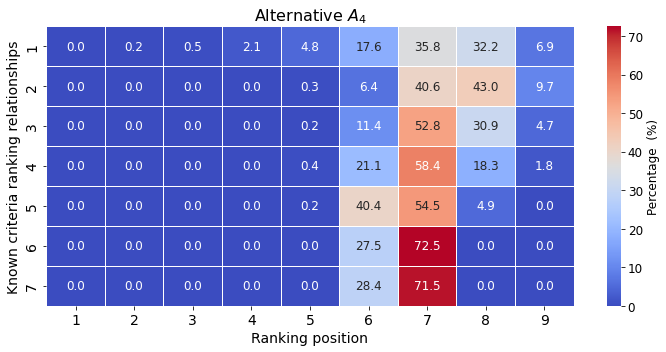

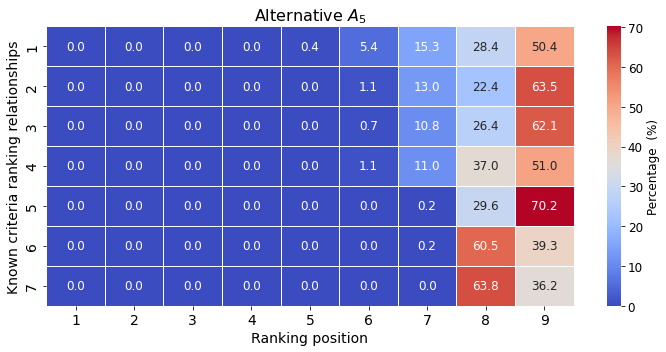

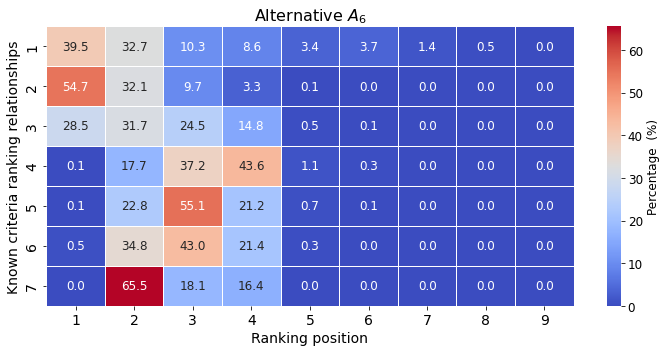

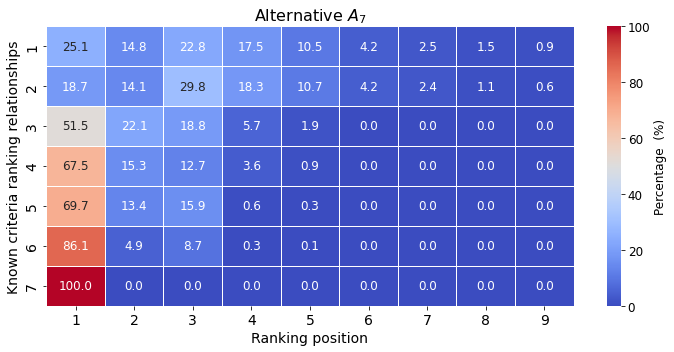

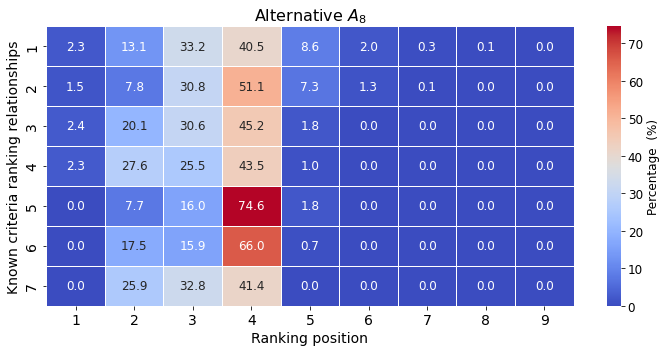

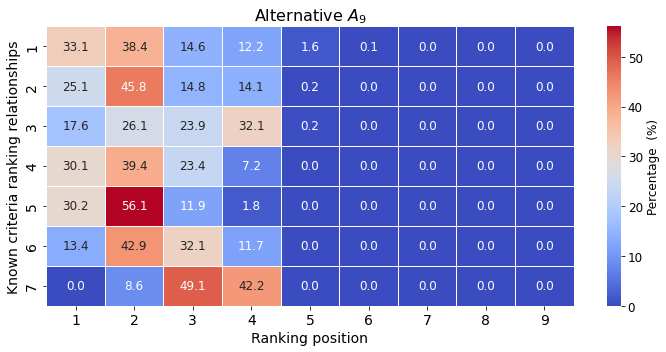

In [34]:
import seaborn as sns

for idx, data in enumerate(alts_data_rank):
    plt.figure(figsize=(10, 5))

    ax = sns.heatmap(np.array(data)[::-1], annot=True, fmt='.1f', cmap="coolwarm", linewidths=0.5, xticklabels=[f"{i+1}" for i in range(len(alts_data_rank))], yticklabels=[f"{i+1}" for i in range(len(data))], cbar=True,  annot_kws={"size": 12},  cbar_kws={"shrink": 1, "aspect": 20} )
    plt.xlabel("Ranking position", fontsize=14)
    plt.ylabel("Known criteria ranking relationships", fontsize=14)
    plt.title(f"Alternative $A_{idx+1}$", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    cbar = ax.collections[0].colorbar
    cbar.set_label("Percentage  (%)", fontsize=12)
    cbar.ax.tick_params(labelsize=12)

    plt.tight_layout()
    plt.savefig(f'a{idx+1}.pdf')
    plt.show()